In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
from keras.models import Sequential,load_model
from keras.layers import Input,Conv2D,MaxPooling2D, Flatten,Dense, Dropout,Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras import layers,models
from keras.datasets import cifar100
from keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar100.load_data()
x_train.shape

169001437/169001437 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

Training samples-50000
each sample is  32/32 image
Number of channels -3


In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
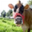

In [ ]:
x_train[0]

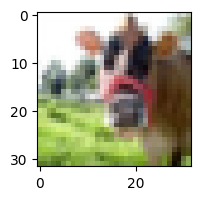

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[0])

In [ ]:
x_train=x_train/255
x_test=x_test/255

values are normalised

**CNN**

In [ ]:
#initializing CNN model 3
model=Sequential()

#Stack 1
#Convolution
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
#pooling
model.add(MaxPooling2D(pool_size=2,strides=2))
#dropout
model.add(Dropout(0.2))

#stack 2
#convolution
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
#pooling
model.add(MaxPooling2D(pool_size=2,strides=2))
#BatchNormalization
model.add(BatchNormalization())
#dropout
model.add(Dropout(0.3))

#stack 3
#convolution
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
#pooling
model.add(MaxPooling2D(pool_size=2,strides=2))
#BatchNormalization
model.add(BatchNormalization())
#dropout
model.add(Dropout(0.3))

#stack 4
#convolution
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
#pooling
model.add(MaxPooling2D(pool_size=2,strides=2))
#BatchNormalization
model.add(BatchNormalization())
#dropout
model.add(Dropout(0.3))

#flattening
model.add(Flatten())

#full connection
model.add(Dense(units=1000,activation="relu"))
#dropout
model.add(Dropout(0.3))

#full connection
model.add(Dense(units=500,activation="relu"))
#dropout
model.add(Dropout(0.3))

#full connection
model.add(Dense(units=100,activation="relu"))
#dropout
model.add(Dropout(0.3))

#output layer
model.add(Dense(units=100,activation="softmax"))




**Brief**

This code snippet defines a convolutional neural network (CNN) model using Keras with the following architecture:

Four stacks of convolutional layers followed by max pooling, batch normalization, and dropout.
Flattening layer to convert the output into a 1D array.
Three fully connected layers with dropout.
Output layer with softmax activation for multi-class classification with 100 classes.






**Detail**

This is a convolutional neural network (CNN) model defined using the Keras Sequential API. Let's break down the architecture:

Input Layer: The input shape is determined by x_train.shape[1:], which assumes that x_train is a tensor representing the input images.

Stack 1: Two convolutional layers with 32 filters each, followed by max-pooling with a pool size of 2x2 and dropout with a rate of 0.2.

Stack 2: Two convolutional layers with 64 filters each, followed by max-pooling with a pool size of 2x2, batch normalization, and dropout with a rate of 0.3.

Stack 3: Similar to Stack 2, two convolutional layers with 64 filters each, followed by max-pooling, batch normalization, and dropout with a rate of 0.3.

Stack 4: Two convolutional layers with 128 filters each, followed by max-pooling, batch normalization, and dropout with a rate of 0.3.

Flattening: Flattens the output of the convolutional layers to prepare for the fully connected layers.

Fully Connected Layers: Three dense (fully connected) layers with 1000, 500, and 100 units respectively, each followed by ReLU activation and dropout with a rate of 0.3.

Output Layer: The final layer with 100 units and softmax activation, suitable for multi-class classification tasks.

Overall, this model consists of multiple convolutional layers for feature extraction, followed by fully connected layers for classification. Batch normalization and dropout are used to improve generalization and prevent overfitting. The output layer produces class probabilities for each of the 100 classes.






In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=1,batch_size=0)

1563/1563 [==============================] - 329s 211ms/step - loss: 4.4236 - accuracy: 0.0270


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Accuracy on test data: {test_acc}')

313/313 [==============================] - 16s 49ms/step - loss: 4.6054 - accuracy: 0.0100
Accuracy on test data: 0.009999999776482582


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 16s 50ms/step - loss: 4.6054 - accuracy: 0.0100


[4.6054158210754395, 0.009999999776482582]